## 1. NLTK 모듈 로딩
 - nltk, 불용어 목록, Tokenizer

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

- text data loading

In [3]:
# trumph.txt: 트럼프 연설문
# spiderman1.txt: 스파이더맨1 스크립트
# frozen_script.txt: 겨울왕국 스크립트

data = open('../../data/spiderman1.txt').read()

In [4]:
data[:100]

'Who am I? You sure you want to know?\nThe story of my life\nis not for the faint of heart.\nIf somebody'

- 형태소 분리

In [5]:
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
token_raw_data = tokenizer.tokenize(data)
print(token_raw_data)

['Who', 'am', 'I', 'You', 'sure', 'you', 'want', 'to', 'know', 'The', 'story', 'of', 'my', 'life', 'is', 'not', 'for', 'the', 'faint', 'of', 'heart', 'If', 'somebody', 'said', 'it', 'was', 'a', 'happy', 'little', 'tale', 'if', 'somebody', 'told', 'you', 'I', 'was', 'just', 'an', 'average', 'ordinary', 'guy', 'not', 'a', 'care', 'in', 'the', 'world', 'somebody', 'lied', 'But', 'let', 'me', 'assure', 'you', 'this', 'like', 'any', 'story', 'worth', 'telling', 'is', 'all', 'about', 'a', 'girl', 'That', 'girl', 'The', 'girl', 'next', 'door', 'Mary', 'Jane', 'Watson', 'The', 'woman', "I've", 'loved', 'since', 'before', 'I', 'even', 'liked', 'girls', "I'd", 'like', 'to', 'tell', 'you', "that's", 'me', 'next', 'to', 'her', 'Aw', 'heck', "I'd", 'even', 'take', 'him', 'Hey', 'Stop', 'the', 'bus', "That's", 'me', 'Tell', 'him', 'to', 'stop', 'Please', 'Stop', 'Hey', 'Stop', 'the', 'bus', 'Stop', 'the', 'bus', "He's", 'been', 'chasing', 'us', 'since', 'Woodhaven', 'Blvd', 'Catch', 'a', 'cab', 'Par

- 불용어(stop words) 제거

In [6]:
stop_word_list = open('../resource/eng_stop_word.txt').read()
token_data = [each_word for each_word in token_raw_data if (each_word not in stopwords.words()) and (each_word not in stop_word_list)]

# 1글자 이하 또는 10글자 이상 단어 삭제
filtered_token_data = []
for i in range(0, len(token_data)):
    if len(token_data[i]) >= 2 and len(token_data[i]) <= 10 :
        filtered_token_data.append(token_data[i])

# 카운팅 후 상위 100개 단어 필터링
from collections import Counter
cnt_filtered_token_data = dict(Counter(filtered_token_data).most_common(100))
print(cnt_filtered_token_data)

{"I'm": 72, 'You': 67, 'What': 44, 'Oh': 34, 'Spiderman': 32, 'Peter': 30, 'No': 29, 'Harry': 28, "You're": 27, "That's": 25, 'Hey': 24, "It's": 24, "Don't": 21, 'Well': 21, 'time': 21, "He's": 20, 'gonna': 20, "I'll": 20, 'Yeah': 18, 'give': 18, 'God': 18, 'He': 17, 'Parker': 16, 'Dad': 16, 'great': 16, 'Bone': 16, 'Saw': 16, "I've": 13, 'Come': 13, 'spider': 13, 'Mr': 13, 'back': 13, 'Stop': 12, 'Norman': 12, 'Osborn': 12, 'Get': 12, 'Thanks': 11, 'father': 11, 'make': 11, 'May': 11, 'Go': 11, 'That': 10, 'stop': 10, 'sorry': 10, 'Your': 10, 'This': 10, 'love': 10, 'In': 10, 'How': 10, 'guy': 9, 'girl': 9, 'Mary': 9, 'Jane': 9, 'Why': 9, 'It': 9, 'Yes': 9, 'talk': 9, 'They': 9, 'All': 9, 'job': 9, 'happened': 9, 'page': 9, 'Who': 8, 'told': 8, "I'd": 8, 'Thank': 8, "Let's": 8, 'Where': 8, 'school': 8, 'Just': 8, 'Pete': 8, 'web': 8, 'Ben': 8, 'feel': 8, 'fine': 8, 'Now': 8, 'problem': 8, 'Look': 8, 'Aunt': 8, 'Tell': 7, 'Hi': 7, "What's": 7, "There's": 7, 'Are': 7, 'If': 6, 'late': 6

- 시각화

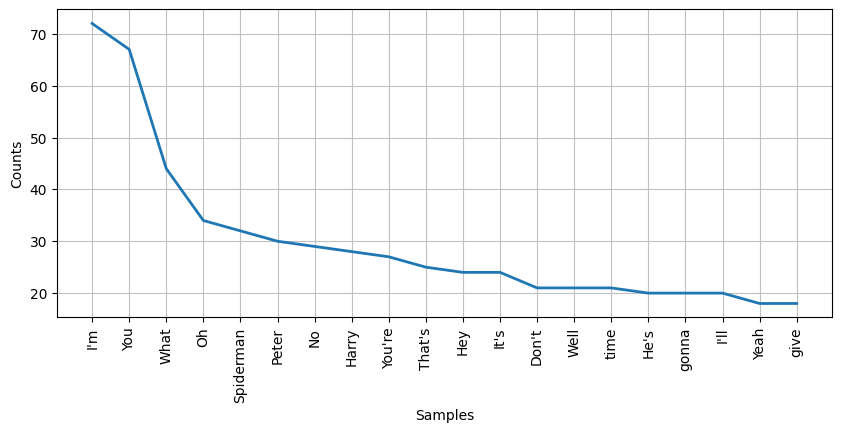

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))

g_data = nltk.Text(filtered_token_data, name = '다빈도 단어 그래프')
g_data.plot(20)

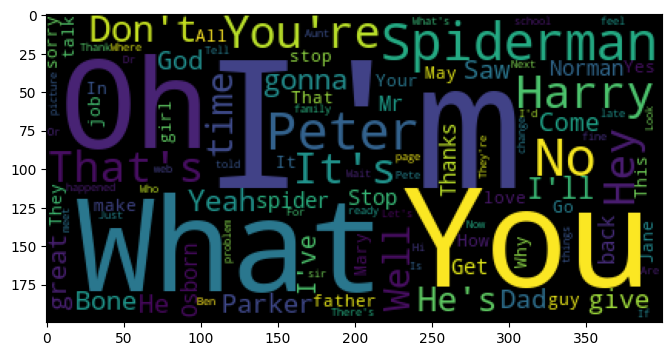

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(relative_scaling = 0.2, background_color = 'black').generate_from_frequencies(cnt_filtered_token_data)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()